In [2]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re

In [ ]:
page = requests.get("https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-30a8d995f78a&sort=popularity&page=2")
soup = BeautifulSoup(page.text)
p = soup.find_all("div",class_="_30jeq3 _1_WHN1")


In [23]:
page = requests.get("https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-30a8d995f78a&sort=popularity&page=2")
soup = BeautifulSoup(page.text)
p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

prices = []
for i in p:
    prices.append(i.text)
    
brands = []
for i in soup.find_all("div",class_="_4rR01T"):
    brands.append(i.text.split()[0])
    
models=[]
for i in soup.find_all("div",class_="_4rR01T"):
    models.append(i.text.split("(")[0])
    
color=[]
for i in soup.find_all("div",class_="_4rR01T"):
    if "(" in i.text:
        color.append(i.text.split("(")[1].split(",")[0])
    else:
        color.append(np.nan)


    
data = soup.find_all("li",class_="rgWa7D")

    
ROM=[]
for i in data:
    a = i.text
    if "GB" in a:
        ROM.append(re.findall(r"(\d+)\sGB\sROM",a)[0])
    elif "MB" in a:
        ROM.append(re.findall(r"(\d+)\sMB\sROM",a)[0])

RAM = []
for i in data:
    a = i.text
    if "GB" in a:
        b = re.findall(r"(\d+)\sGB\sRAM",a)
        if len(b)>0:
            RAM.append(b[0])
    elif "MB" in a:
        b = re.findall(r"(\d+)\sMB\sRAM",a)
        if len(b)>0:
            RAM.append(b[0])
        
ss=[]
for i in data:
    a = i.text
    b = re.findall(r"(\d+.\d+)\sinch",a)
    if b:
        ss.append(b[0])
        
battery=[]
for i in data:
    a = i.text
    b = re.findall(r"(\d+)\smAh",a)
    if b:
        battery.append(b[0])

In [32]:
dictionary = {
    "Brand":brands,
    "Model":models,
    "RAM":RAM,
    "ROM":ROM,
    "Screen Size":ss,
    "Battery":battery,
    "Color":color,
    "Price":prices
}

In [33]:
df1 = pd.DataFrame(dictionary)
df1

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
0,vivo,vivo T1X,4,128,6.58,5000,Space Blue,"₹12,999"
1,vivo,vivo T1 44W,6,128,6.44,5000,Ice Dawn,"₹15,999"
2,POCO,POCO C31,NaN,64,6.53,NaN,Shadow Gray,"₹9,499"
3,SAMSUNG,SAMSUNG Galaxy F13,NaN,64,6.6,5000,Waterfall Blue,"₹11,999"
4,SAMSUNG,SAMSUNG Galaxy F13,4,64,6.6,NaN,Nightsky Green,"₹11,999"
5,MOTOROLA,MOTOROLA e40,4,64,6.5,6000,Pink Clay,"₹8,599"
6,REDMI,REDMI 10,4,64,6.7,6000,Midnight Black,"₹10,999"
7,APPLE,APPLE iPhone 11,4,128,6.1,5000,Black,"₹48,900"
8,vivo,vivo T1 5G,4,128,6.58,6000,Starlight Black,"₹19,990"
9,Nokia,Nokia 105 SS,8,32,1.77,5000,NaN,"₹1,299"


In [31]:
len(battery)

24

In [30]:
battery.insert(2,np.nan)

In [35]:
url = ["""https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show
=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_
QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-
22ff-45f3-abdb-30a8d995f78a&sort=popularity&page=2""",

"""https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-
30a8d995f78a&sort=popularity&page=3""",
      
"""https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-
abdb-30a8d995f78a&sort=popularity&page=40"""]

In [37]:
"""https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-
abdb-30a8d995f78a&sort=popularity&page="""+str(40)

'https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-\nabdb-30a8d995f78a&sort=popularity&page=40'

In [36]:
for i in url:
    print(i)
    page = requests.get(i)
    

https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show
=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_
QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-
22ff-45f3-abdb-30a8d995f78a&sort=popularity&page=2
https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-
30a8d995f78a&sort=popularity&page=3
https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-
abdb-30a8d995f78a&sort=popularity&page=4


In [ ]:
for i in range(3,6):
    urls = "https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-30a8d995f78a&sort=popularity&page="+str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")


In [53]:
prices = []
brands = []
models=[]
color=[]
ROM=[]
RAM = []
ss =[]
battery=[]
for i in range(3,6):
    urls = "https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-30a8d995f78a&sort=popularity&page="+str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)
    p = soup.find_all("div",class_="_30jeq3 _1_WHN1")

    
    for i in p:
        prices.append(i.text)

    
    for i in soup.find_all("div",class_="_4rR01T"):
        brands.append(i.text.split()[0])

    
    for i in soup.find_all("div",class_="_4rR01T"):
        models.append(i.text.split("(")[0])

    
    for i in soup.find_all("div",class_="_4rR01T"):
        if "(" in i.text:
            color.append(i.text.split("(")[1].split(",")[0])
        else:
            color.append(np.nan)



    data = soup.find_all("li",class_="rgWa7D")


    
    for i in data:
        a = i.text
        if "GB" in a:
            ROM.append(re.findall(r"(\d+)\sGB\sROM",a)[0])
        elif "MB" in a:
            ROM.append(re.findall(r"(\d+)\sMB\sROM",a)[0])

    
    for i in data:
        a = i.text
        if "GB" in a:
            b = re.findall(r"(\d+)\sGB\sRAM",a)
            if len(b)>0:
                RAM.append(b[0])
        elif "MB" in a:
            b = re.findall(r"(\d+)\sMB\sRAM",a)
            if len(b)>0:
                RAM.append(b[0])

    
    for i in data:
        a = i.text
        b = re.findall(r"(\d+.\d+)\sinch",a)
        if b:
            ss.append(b[0])

    
    for i in data:
        a = i.text
        b = re.findall(r"(\d+)\smAh",a)
        if b:
            battery.append(b[0])
            
    print(i,"------>", len(RAM))
    print(i,"------>", len(battery))
    print(i,"------>", len(ss))

https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-30a8d995f78a&sort=popularity&page=3
<li class="rgWa7D">One Year for Handset, 6 Months for Accessories</li> ------> 23
<li class="rgWa7D">One Year for Handset, 6 Months for Accessories</li> ------> 23
<li class="rgWa7D">One Year for Handset, 6 Months for Accessories</li> ------> 24
https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_6_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles%7CMobiles&requestId=52294e36-22ff-45f3-abdb-30a8d995f78a&sort=popularity&page=4
<li class="rgWa7D">Brand Warranty for 1 Year</li> ------> 46
<li class="rgWa7D">Brand Warranty for 1 Year</li> ------> 46
<li class="r

In [56]:
#RAM.extend([np.nan,np.nan,np.nan,np.nan])

In [58]:
#ss.insert(30,np.nan)

In [59]:
dictionary = {
    "Brand":brands,
    "Model":models,
    "RAM":RAM,
    "ROM":ROM,
    "Screen Size":ss,
    "Battery":battery,
    "Color":color,
    "Price":prices
}

In [60]:
df2 = pd.DataFrame(dictionary)
df2

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
0,Infinix,Infinix HOT 12 Play,4,64,6.82,6000,Horizon Blue,"₹8,299"
1,REDMI,REDMI 10,6,128,6.7,6000,Midnight Black,"₹12,999"
2,MOTOROLA,MOTOROLA G40 Fusion,6,128,6.78,6000,Frosted Champagne,"₹13,499"
3,REDMI,REDMI 10,6,128,6.7,6000,Pacific Blue,"₹12,999"
4,MOTOROLA,MOTOROLA g31,6,128,6.4,5000,Baby Blue,"₹11,999"
...,...,...,...,...,...,...,...,...
67,vivo,vivo T1X,8,128,6.58,5000,Gravity Black,"₹12,999"
68,Infinix,Infinix Hot 11 2022,NaN,64,6.7,NaN,Sunset Gold,"₹7,999"
69,Infinix,Infinix Smart 6 HD,NaN,32,6.6,NaN,Origin Blue,"₹5,999"
70,APPLE,APPLE iPhone 12,NaN,128,6.1,NaN,Purple,"₹53,999"


In [61]:
df = pd.read_csv("batch_191.csv")

In [64]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [66]:
final_df = pd.concat([df,df1,df2],axis=0)
final_df

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
0,APPLE,APPLE iPhone 13,NaN,128,6.1,NaN,Starlight,"₹65,999"
1,APPLE,APPLE iPhone 13,6.0,128,6.1,5000.0,Midnight,"₹65,999"
2,APPLE,APPLE iPhone 13,NaN,128,6.1,5000.0,Pink,"₹65,999"
3,realme,realme 9,NaN,128,6.4,NaN,Meteor Black,"₹16,999"
4,realme,realme 9,6.0,128,6.4,5000.0,Sunburst Gold,"₹16,999"
...,...,...,...,...,...,...,...,...
67,vivo,vivo T1X,8,128,6.58,5000,Gravity Black,"₹12,999"
68,Infinix,Infinix Hot 11 2022,NaN,64,6.7,NaN,Sunset Gold,"₹7,999"
69,Infinix,Infinix Smart 6 HD,NaN,32,6.6,NaN,Origin Blue,"₹5,999"
70,APPLE,APPLE iPhone 12,NaN,128,6.1,NaN,Purple,"₹53,999"


In [3]:
final_df.reset_index(inplace=True)
final_df.drop('index',axis=1,inplace=True)

NameError: name 'final_df' is not defined

In [69]:
final_df.head()

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
0,APPLE,APPLE iPhone 13,NaN,128,6.1,NaN,Starlight,"₹65,999"
1,APPLE,APPLE iPhone 13,6.0,128,6.1,5000.0,Midnight,"₹65,999"
2,APPLE,APPLE iPhone 13,NaN,128,6.1,5000.0,Pink,"₹65,999"
3,realme,realme 9,NaN,128,6.4,NaN,Meteor Black,"₹16,999"
4,realme,realme 9,6.0,128,6.4,5000.0,Sunburst Gold,"₹16,999"


In [71]:
final_df.shape

(120, 8)

In [92]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        120 non-null    object 
 1   Model        120 non-null    object 
 2   RAM          120 non-null    int32  
 3   ROM          120 non-null    object 
 4   Screen Size  120 non-null    float64
 5   Battery      120 non-null    int32  
 6   Color        120 non-null    object 
 7   Price        120 non-null    int32  
dtypes: float64(1), int32(3), object(4)
memory usage: 6.2+ KB


In [74]:
final_df.isnull().sum()

Brand           0
Model           0
RAM            13
ROM             0
Screen Size     1
Battery        13
Color           4
Price           0
dtype: int64

## Type casting

In [76]:
final_df['Battery'].fillna('0',inplace=True)

In [80]:
final_df['Battery'] = final_df['Battery'].astype('int')

In [84]:
final_df['Screen Size'].fillna(method='ffill',inplace=True)
final_df['RAM'].fillna('0',inplace=True)
final_df['Color'].fillna('0',inplace=True)

In [86]:
final_df['Screen Size'] = final_df['Screen Size'].astype('float')
final_df['RAM'] = final_df['RAM'].astype('int')

In [90]:
final_df['Price'] = final_df['Price'].apply(lambda x:x.replace("₹","").replace(",",""))

In [91]:
final_df['Price'] = final_df['Price'].astype('int')

In [93]:
final_df.head()

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
0,APPLE,APPLE iPhone 13,0,128,6.1,0,Starlight,65999
1,APPLE,APPLE iPhone 13,6,128,6.1,5000,Midnight,65999
2,APPLE,APPLE iPhone 13,0,128,6.1,5000,Pink,65999
3,realme,realme 9,0,128,6.4,0,Meteor Black,16999
4,realme,realme 9,6,128,6.4,5000,Sunburst Gold,16999


## Data Analysis

In [96]:
## check the count of brands
final_df['Brand'].unique()

array(['APPLE', 'realme', 'vivo', 'POCO', 'SAMSUNG', 'MOTOROLA', 'REDMI',
       'Nokia', 'OPPO', 'Infinix'], dtype=object)

In [97]:
final_df['Brand'].value_counts()

vivo        22
Infinix     22
realme      20
APPLE       13
MOTOROLA    12
REDMI       10
POCO         9
SAMSUNG      6
Nokia        4
OPPO         2
Name: Brand, dtype: int64

In [103]:
final_df[['Brand','Model','Price']].value_counts()

Brand     Model                   Price
APPLE     APPLE iPhone 13         65999    5
Infinix   Infinix HOT 12 Play     8299     5
realme    realme 9                17999    5
vivo      vivo T1 44W             15999    4
Infinix   Infinix Smart 6         6499     4
APPLE     APPLE iPhone 11         48900    4
realme    realme C33              8999     3
                                  9999     3
vivo      vivo T1 44W             14499    3
SAMSUNG   SAMSUNG Galaxy F23 5G   18499    3
Infinix   Infinix Smart 6 HD      5999     3
SAMSUNG   SAMSUNG Galaxy F13      11999    3
vivo      vivo T1 5G              15990    3
Infinix   Infinix Hot 12          8799     3
          Infinix Hot 11 2022     7999     3
REDMI     REDMI 10                10999    3
realme    realme 9                16999    3
REDMI     REDMI 9i Sport          8999     2
          REDMI 10                12999    2
POCO      POCO M4 Pro             16499    2
realme    realme C31              9299     2
               

In [105]:
final_df.groupby('Brand')['Model'].count()

Brand
APPLE       13
Infinix     22
MOTOROLA    12
Nokia        4
OPPO         2
POCO         9
REDMI       10
SAMSUNG      6
realme      20
vivo        22
Name: Model, dtype: int64

In [112]:
final_df.describe()

,RAM,Screen Size,Battery,Price
count,120.000000,120.000000,120.000000,120.000000
mean,4.675000,6.358500,4480.000000,16734.133333
std,4.124456,0.874956,1784.225934,14366.912108
min,0.000000,1.770000,0.000000,1299.000000
25%,4.000000,6.430000,5000.000000,8999.000000
50%,4.000000,6.530000,5000.000000,12999.000000
75%,6.000000,6.600000,5000.000000,16990.000000
max,32.000000,6.820000,6000.000000,65999.000000


In [110]:
final_df.groupby('Brand').agg({'Price':['sum','mean','std']})

Price                           
             sum          mean          std
Brand                                      
APPLE     717591  55199.307692  9359.797019
Infinix   175878   7994.454545  1369.211547
MOTOROLA  144088  12007.333333  2201.428600
Nokia       5396   1349.000000    57.735027
OPPO       29980  14990.000000     0.000000
POCO      127991  14221.222222  3073.181486
REDMI     108683  10868.300000  2264.735062
SAMSUNG    91494  15249.000000  3560.196624
realme    261580  13079.000000  3935.345902
vivo      345415  15700.681818  2166.989406

In [107]:
final_df['Brand'].unique()

array(['APPLE', 'realme', 'vivo', 'POCO', 'SAMSUNG', 'MOTOROLA', 'REDMI',
       'Nokia', 'OPPO', 'Infinix'], dtype=object)

In [108]:
np.nan

nan

In [109]:
'NaN'

'NaN'

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

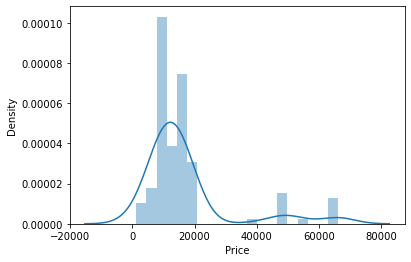

In [116]:
sns.distplot(final_df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

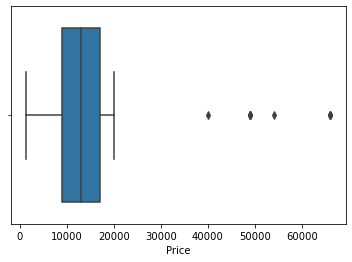

In [117]:
sns.boxplot(final_df['Price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RAM', ylabel='Price'>

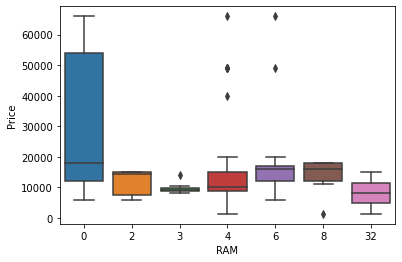

In [118]:
sns.boxplot('RAM','Price',data=final_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='Price'>

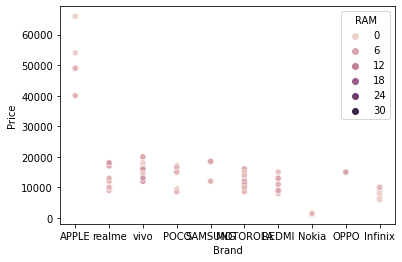

In [122]:
sns.scatterplot('Brand','Price', hue="RAM", data=final_df)

In [125]:
final_df[final_df['Price'] == final_df['Price'].max()]

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
0,APPLE,APPLE iPhone 13,0,128,6.1,0,Starlight,65999
1,APPLE,APPLE iPhone 13,6,128,6.1,5000,Midnight,65999
2,APPLE,APPLE iPhone 13,0,128,6.1,5000,Pink,65999
15,APPLE,APPLE iPhone 13,4,128,6.1,0,Green,65999
16,APPLE,APPLE iPhone 13,0,128,6.1,5000,Blue,65999


In [126]:
final_df[final_df['Price'] == final_df['Price'].min()]

,Brand,Model,RAM,ROM,Screen Size,Battery,Color,Price
33,Nokia,Nokia 105 SS,8,32,1.77,5000,0,1299
34,Nokia,Nokia 105 SS,32,32,1.77,800,0,1299
